## THEORITICAL PART ON MISSING VALUES:

### Types of missing values?

There are four qualitatively distinct types of missing data. Missing data is either: structurally missing, missing completely at random (MCAR), missing at random, or nonignorable (also known as missing not at random). Different types of missing data need to be treated differently in order for any analysis to be meaningful.

### 1. Structurally missing values? 

Structurally missing data is data that is missing for a logical reason. In other words, it is data that is missing because it should not exist

### 2. Missing completely at random?

we need to ask ourselves: what is the likely income of the fourth observation? The simplest approach is to note that 50% of the other people have high incomes and 50% have low incomes. We could assume, therefore, that there is a 50% chance she has a high income and a 50% chance she has a low income. This is known as assuming that the missing value is missing completely at random (MCAR).

DEFINITION:

A variable is missing completely at random (MCAR) if the probability of being missing is the same for all the observations. When data is MCAR, there is absolutely no relationship between the data missing and any other values, observed or missing, within the dataset. In other words, those missing data points are a random subset of the data. There is nothing systematic going on that makes some data more likely to be missing than other.

### 3. Missing at random (MAR)?

When data is missing at random, it means that we need to either use an advanced imputation method, such as multiple imputation, or an analysis method specifically designed for missing at random data.

Missing at random is always a safer assumption than missing completely at random. This is because any analysis that is valid with the assumption that the data is missing completely at random will also be valid under the assumption that the data is missing at random, but the opposite is not the case.

Systematic missing Values There is absolutely some relationship between the data missing and any other values, observed or missing, within the dataset.

### 4. Missing not at random (nonignorable)?

It may be the case that we cannot confidently make any conclusions about the likely value of missing data. For example, it is possible that people with very low incomes and very high incomes tend to refuse to answer. Or there could be some other reason we just do not know. This is known as missing not at random data and also as nonignorable missing data.

When data is missing not at random, it means that we cannot use any of the standard methods for dealing with missing data (e.g., imputation, or algorithms specifically designed for missing values). If the missing data is missing not at random, any standard calculations give the wrong answer.

## 1. MCAR 

In [1]:
import pandas as pd
import numpy as np

In [2]:
#read the dataset:

df = pd.read_csv(r"C:\Users\Harsh Jain\Desktop\HARSH JAIN\3. EVERYTHING RELATED TO DATA\DATA SCIENCE\DATASETS\titanic train.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### INSIGHTS:

1. Here we can see that Age and Cabin has some relationship between them(Bcoz this dataset was collected after the  incident so people were not alive to tell their age and in which cabin they stayed.) so they does not come under MCAR.
2. Here Embarked comes under MCAR Category

In [5]:
#Check which rows have the null values:
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


## 2. Missing Not At Random 

#### Cabin and Age is Missing not at random

In [6]:
#we'll replace the null values with 1 and not null values with 0: THIS IS JUST TO FIND THE PERCENTAGE:

df['cabin_null']=np.where(df['Cabin'].isnull(),1,0)

##find the percentage of null values
df['cabin_null'].mean()

0.7710437710437711

In [7]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'cabin_null'],
      dtype='object')

In [9]:
### Survived - 60% of missing values.  Not Survived - 87% missing values.

df.groupby(['Survived'])['cabin_null'].mean()

Survived
0    0.876138
1    0.602339
Name: cabin_null, dtype: float64

## 3. Missing At Random (MAR)

#### Examples - 1. Men -- hide their salary    2. Women - hide their age

# Techniques to handle missing data:

1. Mean/ Median/Mode replacement
2. Random Sample Imputation
3. Capturing NAN values with a new feature
4. End of Distribution imputation
5. Arbitrary imputation
6. Frequent categories imputation

### 1. MEAN/MEDIAN/MODE IMPUTATION

It works only with numerical variables.

When should we apply? 

1. Mean/median/Mode imputation has the assumption that the data are missing completely at random(MCAR). 
2. We solve this by replacing the NAN with the most frequent / mean / median occurance of the variables.

In [10]:

df=pd.read_csv(r"C:\Users\Harsh Jain\Desktop\HARSH JAIN\3. EVERYTHING RELATED TO DATA\DATA SCIENCE\DATASETS\titanic train.csv",usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [14]:
df.isnull().mean()

Survived      0.000000
Age           0.198653
Fare          0.000000
Age_median    0.000000
dtype: float64

In [11]:
### Function to impute nan values :

def impute_nan(df,variable,median):
    # we create a new feature to store this data.
    df[variable+"_median"]=df[variable].fillna(median)

In [12]:
#Calculate the median to pass to the above function.

median=df.Age.median()
median

28.0

In [13]:
#Call the impute_nan function to replace the nan values with median.

impute_nan(df,'Age',median)
df.head()

,Survived,Age,Fare,Age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


In [15]:
## Check the standard deviation before and after imputation ---  there must de some decrease.

print(df['Age'].std())
print(df['Age_median'].std())

14.526497332334044
13.019696550973194


In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

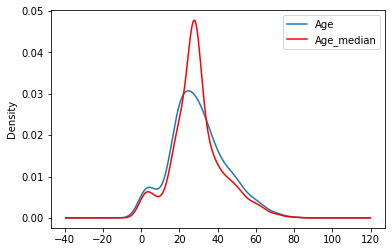

In [17]:
### This shows the distribution of age and age_mdeian in graphical manner:

fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df.Age_median.plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

#### Advantages And Disadvantages of Mean/Median Imputation

1. Advantages:
    
    1. Easy to implement(Robust to outliers).
    2. Faster way to obtain the complete dataset.

2. Disadvantages:
    
    1. Change or Distortion in the original variance.
    2. Impacts Correlation.

                        IN THIS NOTEBOOK WE LEARN'T THE THEORITICAL PART OF 
                        MISSING VALUES AND OUR FIRST TECHIQUE 
                        MEAN/MEDIAN TECHNIQUE.